In [1]:
%pylab inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
koubei = pd.read_csv(
    'data/ijcai2016_koubei_train', header=None, names=['user_id', 'merchant_id', 'location_id', 'timestamp']
)

In [4]:
pred = pd.read_csv('data/ijcai2016_koubei_test', header=None, names=['user_id', 'location_id']).set_index(['user_id', 'location_id'])

In [5]:
ulmg10 = koubei[koubei.timestamp.between(20151001, 20151031)].groupby(['user_id', 'location_id', 'merchant_id'])

In [6]:
ulm10_cnt = pd.DataFrame(dict(
    ulm_r1d_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151030)),
    ulm_r2d_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151029)),
    ulm_r3d_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151028)),
    ulm_r4d_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151027)),
    ulm_r5d_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151026)),
    ulm_r1w_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151023)),
    ulm_r2w_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151016)),
    ulm_r3w_cnt=ulmg10.timestamp.agg(lambda d: sum(d > 20151009)),
    ulm_r1m_cnt=ulmg10.timestamp.agg(lambda d: sum(d >= 20151001))
))

In [7]:
ulm10_cnt.head()

,,,ulm_r1d_cnt,ulm_r1m_cnt,ulm_r1w_cnt,ulm_r2d_cnt,ulm_r2w_cnt,ulm_r3d_cnt,ulm_r3w_cnt,ulm_r4d_cnt,ulm_r5d_cnt
user_id,location_id,merchant_id,,,,,,,,,
4,254,3527,0,1,0,0,0,0,0,0,0
22,371,4264,0,1,0,0,1,0,1,0,0
38,272,820,0,1,1,0,1,0,1,0,0
55,438,820,0,1,0,0,1,0,1,0,0
108,30,8646,0,4,0,0,0,0,4,0,0


In [8]:
ulg10 = koubei[koubei.timestamp.between(20151001, 20151031)].groupby(['user_id', 'location_id'])

In [9]:
ul10_cnt = pd.DataFrame(dict(
    ul_r1d_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151030)),
    ul_r2d_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151029)),
    ul_r3d_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151028)),
    ul_r4d_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151027)),
    ul_r5d_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151026)),
    ul_r1w_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151023)),
    ul_r2w_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151016)),
    ul_r3w_cnt=ulg10.timestamp.agg(lambda d: sum(d > 20151009)),
    ul_r1m_cnt=ulg10.timestamp.agg(lambda d: sum(d >= 20151001))
))

In [10]:
ul10_cnt.head()

,,ul_r1d_cnt,ul_r1m_cnt,ul_r1w_cnt,ul_r2d_cnt,ul_r2w_cnt,ul_r3d_cnt,ul_r3w_cnt,ul_r4d_cnt,ul_r5d_cnt
user_id,location_id,,,,,,,,,
4,254,0,1,0,0,0,0,0,0,0
22,371,0,1,0,0,1,0,1,0,0
38,272,0,1,1,0,1,0,1,0,0
55,438,0,1,0,0,1,0,1,0,0
108,30,0,4,0,0,0,0,4,0,0


In [11]:
umg10 = koubei[koubei.timestamp.between(20151001, 20151031)].groupby(['user_id', 'merchant_id'])

In [12]:
um10_cnt = pd.DataFrame(dict(
    um_r1d_cnt=umg10.timestamp.agg(lambda d: sum(d - 20151030)),
    um_r2d_cnt=umg10.timestamp.agg(lambda d: sum(d > 20151029)),
    um_r3d_cnt=umg10.timestamp.agg(lambda d: sum(d > 20151028)),
    um_r4d_cnt=umg10.timestamp.agg(lambda d: sum(d > 20151027)),
    um_r5d_cnt=umg10.timestamp.agg(lambda d: sum(d > 20151026)),
    um_r1w_cnt=umg10.timestamp.agg(lambda d: sum(d > 20151023)),
    um_r2w_cnt=umg10.timestamp.agg(lambda d: sum(d > 20151016)),
    um_r3w_cnt=umg10.timestamp.agg(lambda d: sum(d > 20151009)),
    um_r1m_cnt=umg10.timestamp.agg(lambda d: sum(d >= 20151001))
))

In [13]:
um10_cnt.head()

,,um_r1d_cnt,um_r1m_cnt,um_r1w_cnt,um_r2d_cnt,um_r2w_cnt,um_r3d_cnt,um_r3w_cnt,um_r4d_cnt,um_r5d_cnt
user_id,merchant_id,,,,,,,,,
4,3527,-22,1,0,0,0,0,0,0,0
22,4264,-10,1,0,0,1,0,1,0,0
38,820,-5,1,1,0,1,0,1,0,0
55,820,-11,1,0,0,1,0,1,0,0
108,8646,-74,4,0,0,0,0,4,0,0


In [14]:
trn = pd.merge(
    pd.merge(
        ulm10_cnt.reset_index(), ul10_cnt.reset_index(),
        on=['user_id', 'location_id'], how='left'
    ),
    um10_cnt.reset_index(),
    on=['user_id', 'merchant_id'], how='left'
)

In [15]:
trn.head()

,user_id,location_id,merchant_id,ulm_r1d_cnt,ulm_r1m_cnt,ulm_r1w_cnt,ulm_r2d_cnt,ulm_r2w_cnt,ulm_r3d_cnt,ulm_r3w_cnt,...,ul_r5d_cnt,um_r1d_cnt,um_r1m_cnt,um_r1w_cnt,um_r2d_cnt,um_r2w_cnt,um_r3d_cnt,um_r3w_cnt,um_r4d_cnt,um_r5d_cnt
0,4,254,3527,0,1,0,0,0,0,0,...,0,-22,1,0,0,0,0,0,0,0
1,22,371,4264,0,1,0,0,1,0,1,...,0,-10,1,0,0,1,0,1,0,0
2,38,272,820,0,1,1,0,1,0,1,...,0,-5,1,1,0,1,0,1,0,0
3,55,438,820,0,1,0,0,1,0,1,...,0,-11,1,0,0,1,0,1,0,0
4,108,30,8646,0,4,0,0,0,0,4,...,0,-74,4,0,0,0,0,4,0,0


In [16]:
trn.columns

Index([u'user_id', u'location_id', u'merchant_id', u'ulm_r1d_cnt',
       u'ulm_r1m_cnt', u'ulm_r1w_cnt', u'ulm_r2d_cnt', u'ulm_r2w_cnt',
       u'ulm_r3d_cnt', u'ulm_r3w_cnt', u'ulm_r4d_cnt', u'ulm_r5d_cnt',
       u'ul_r1d_cnt', u'ul_r1m_cnt', u'ul_r1w_cnt', u'ul_r2d_cnt',
       u'ul_r2w_cnt', u'ul_r3d_cnt', u'ul_r3w_cnt', u'ul_r4d_cnt',
       u'ul_r5d_cnt', u'um_r1d_cnt', u'um_r1m_cnt', u'um_r1w_cnt',
       u'um_r2d_cnt', u'um_r2w_cnt', u'um_r3d_cnt', u'um_r3w_cnt',
       u'um_r4d_cnt', u'um_r5d_cnt'],
      dtype='object')

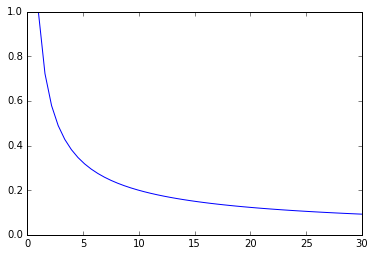

In [17]:
plot(linspace(1, 30), linspace(1, 30) ** -0.7);

In [18]:
trn['ulm_logd'] = ulmg10.timestamp.agg(lambda d: sum(0.7 ** (20151031 - d)))

TypeError: incompatible index of inserted column with frame index

------

In [ ]:
ulmg11 = koubei[koubei.timestamp.between(20151101, 20151130)].groupby(['user_id', 'location_id', 'merchant_id'])

In [ ]:
ulm11_cnt = pd.DataFrame(dict(
    ulm_r1d_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151129)),
    ulm_r2d_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151128)),
    ulm_r3d_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151127)),
    ulm_r4d_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151126)),
    ulm_r5d_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151125)),
    ulm_r1w_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151122)),
    ulm_r2w_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151115)),
    ulm_r3w_cnt=ulmg11.timestamp.agg(lambda d: sum(d > 20151108)),
    ulm_r1m_cnt=ulmg11.timestamp.agg(lambda d: sum(d >= 20151101))
))

In [ ]:
ulm11_cnt.head()

In [ ]:
ulg11 = koubei[koubei.timestamp.between(20151101, 20151130)].groupby(['user_id', 'location_id'])

In [ ]:
ul11_cnt = pd.DataFrame(dict(
    ul_r1d_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151129)),
    ul_r2d_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151128)),
    ul_r3d_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151127)),
    ul_r4d_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151126)),
    ul_r5d_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151125)),
    ul_r1w_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151122)),
    ul_r2w_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151115)),
    ul_r3w_cnt=ulg11.timestamp.agg(lambda d: sum(d > 20151108)),
    ul_r1m_cnt=ulg11.timestamp.agg(lambda d: sum(d >= 20151101))
))

In [ ]:
ul11_cnt.head()

In [ ]:
umg11 = koubei[koubei.timestamp.between(20151101, 20151130)].groupby(['user_id', 'merchant_id'])

In [ ]:
um11_cnt = pd.DataFrame(dict(
    um_r1d_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151129)),
    um_r2d_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151128)),
    um_r3d_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151127)),
    um_r4d_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151126)),
    um_r5d_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151125)),
    um_r1w_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151122)),
    um_r2w_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151115)),
    um_r3w_cnt=umg11.timestamp.agg(lambda d: sum(d > 20151108)),
    um_r1m_cnt=umg11.timestamp.agg(lambda d: sum(d >= 20151101))
))

In [ ]:
um11_cnt.head()

In [ ]:
tst = pd.merge(
    pd.merge(
        ulm11_cnt.reset_index(), ul11_cnt.reset_index(),
        on=['user_id', 'location_id'], how='left'
    ),
    um11_cnt.reset_index(),
    on=['user_id', 'merchant_id'], how='left'
)

In [ ]:
tst.head()

In [ ]:
tst['ulm_logd'] = ulmg11.timestamp.agg(lambda d: sum(0.7 ** (20151130 - d)))

In [ ]:
trn = trn.set_index(['user_id', 'location_id', 'merchant_id'])
tst = tst.set_index(['user_id', 'location_id', 'merchant_id'])

In [ ]:
trn['label'] = list(1 if d else 0 for d in trn.index.isin(tst.index))

In [ ]:
print('正负比：%.2f%%' % (count_nonzero(trn.label==1) / float(count_nonzero(trn.label==0)) * 100))

In [ ]:
cols = list(set(trn.columns) - set(['label']))

In [ ]:
X = trn.as_matrix(cols)
y = trn.as_matrix(['label']).ravel()

In [ ]:
sometrue(isnan(y))

In [ ]:
T = tst.as_matrix(cols)

使用模型筛选用户

In [ ]:
from sklearn import ensemble

In [ ]:
f1 = lambda p, r: 2 * p * r / float(p + r)

In [ ]:
clf = ensemble.RandomForestClassifier(max_depth=8, n_estimators=200, )

In [ ]:
clf.fit(X, y)

In [ ]:
cols[argmax(clf.feature_importances_)]

In [ ]:
hist(clf.predict_proba(X)[:, 1]);

In [ ]:
v = clf.predict_proba(X)[:, 1] > 0.35
print('预测正样本占比：%.2f%%' % (count_nonzero(v==1) / float(len(v)) * 100))
print('实际正样本占比：%.2f%%' % (count_nonzero(y==1) / float(len(y)) * 100))
print('准确率：%.2f%%' % (count_nonzero((v == y) & (y == 1)) / float(count_nonzero(v == 1)) * 100))
print('覆盖率：%.2f%%' % (count_nonzero((v == y) & (y == 1)) / float(count_nonzero(y == 1)) * 100))
print('F1: %.2f%%' % (f1(count_nonzero((v == y) & (y == 1)) / float(count_nonzero(v == 1)), count_nonzero((v == y) & (y == 1)) / float(count_nonzero(y == 1))) * 100))

In [ ]:
t = clf.predict_proba(T)[:, 1] > 0.187
print('正样本比例： %.2f%%' % (count_nonzero(t==1) / float(len(t)) * 100))

In [ ]:
tst['label'] = list(1 if d else 0 for d in t)

In [ ]:
s = tst[tst.label > 0].reset_index()[['user_id', 'location_id', 'merchant_id']].groupby(['user_id', 'location_id']).agg(lambda d: ':'.join(str(i) for i in d))

In [ ]:
s[s.index.isin(pred.index)].to_csv('submit/0428_2.csv')